In [1]:
#Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Load the dataset

epl_df = pd.read_excel("datasets/EPL_2020_2021.xlsx")
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [3]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [4]:
epl_df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [6]:
epl_df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [7]:
epl_df.duplicated().sum()

0

In [9]:
# create 2 columns
epl_df["MinsPerMatch"] = (epl_df["Mins"]/epl_df["Matches"]).astype(int)
epl_df["GoalsPerMatch"] = (epl_df["Goals"] / epl_df["Matches"] ).astype(float)
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


In [11]:
# Total Goals

total_goals = epl_df["Goals"].sum()
print(total_goals)

986


In [12]:
# Total Penalty

total_penalty = epl_df["Penalty_Goals"].sum()
print(total_penalty)

102


In [13]:
# Penalty attempts
total_penalty_attempted = epl_df["Penalty_Attempted"].sum()
print(total_penalty_attempted)

125


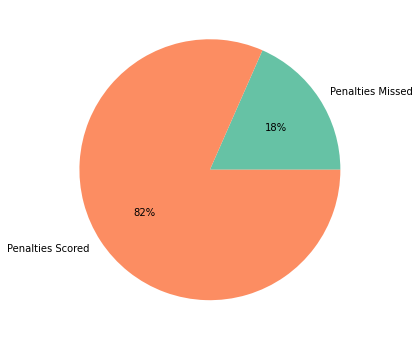

In [14]:
plt.figure(figsize =(13,6))
plt_not_scored = epl_df["Penalty_Attempted"].sum() - total_penalty
data = [plt_not_scored, total_penalty]
labels = ["Penalties Missed", "Penalties Scored"]
color = sns.color_palette("Set2")

plt.pie(data, labels = labels, colors = color, autopct="%.0f%%")
plt.show()

In [15]:
# unique positions

epl_df["Position"].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [29]:
# Total of forward players

epl_df[epl_df["Position"] == "FW"]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


In [21]:
# Players from different nations

np.size((epl_df["Nationality"].unique()))

59

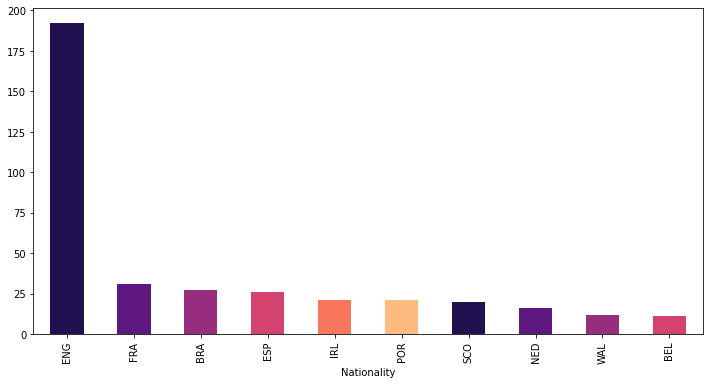

In [31]:
# Most players from which countries

nationality = epl_df.groupby("Nationality").size().sort_values(ascending = False)
nationality.head(10).plot(kind = "bar", figsize = (12,6), color = sns.color_palette("magma"));

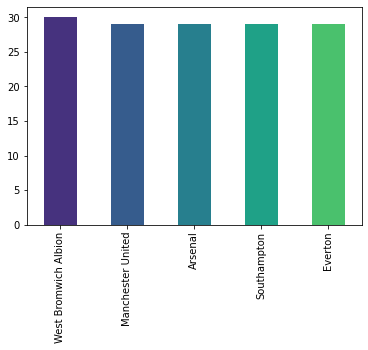

In [38]:
# Clubs with maximum players in their squad

epl_df["Club"].value_counts().nlargest(5).plot(kind = "bar", color = sns.color_palette("viridis"));

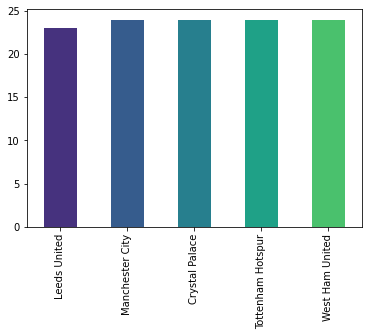

In [39]:
# Clubs with least playes in the squad

epl_df["Club"].value_counts().nsmallest(5).plot(kind = "bar", color = sns.color_palette("viridis"));

In [41]:
# players based in age group

under20 = epl_df[epl_df["Age"] <= 20]
age20_25 = epl_df[(epl_df["Age"] > 20) & (epl_df["Age"] <= 25) ]
age25_30 = epl_df[(epl_df["Age"] > 25) & (epl_df["Age"] <= 30) ]
above30 = epl_df[epl_df["Age"] > 30]

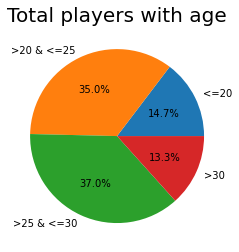

In [44]:
x = np.array([under20["Name"].count(), age20_25["Name"].count(), age25_30["Name"].count(), above30["Name"].count()])
myLabels = ["<=20", ">20 & <=25", ">25 & <=30", ">30"]
plt.title("Total players with age", fontsize = 20)
plt.pie(x, labels = myLabels, autopct="%.1f%%")
plt.show()

In [53]:
# under 20 in each club

u20 = epl_df[epl_df["Age"] < 20][["Club"]].value_counts().sort_values(ascending=False)

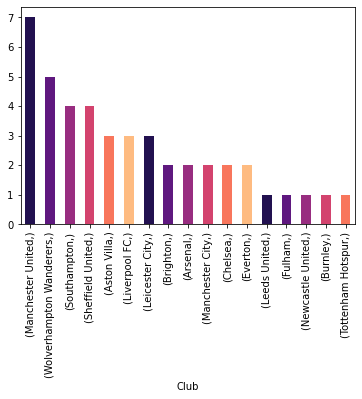

In [54]:
u20.plot(kind = "bar", color = sns.color_palette("magma"));

In [59]:
# U20 in Arsenal
u20 = epl_df[epl_df["Age"] < 20]
u20[u20["Club"] == "Arsenal"]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
184,Bukayo Saka,Arsenal,ENG,"FW,DF",18,32,30,2553,5,3,1155,74.9,0,0,0.24,0.17,1,0,79,0.156250
203,Martinelli,Arsenal,BRA,FW,19,14,7,589,2,1,159,79.2,0,0,0.53,0.32,0,0,42,0.142857


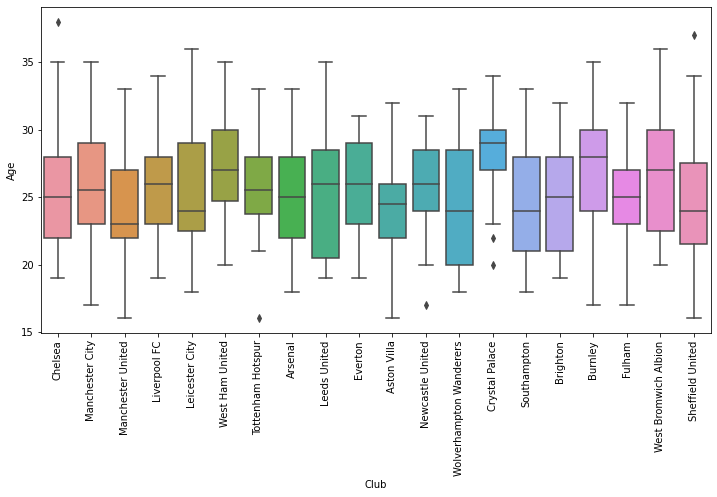

In [62]:
# Plot the Avg age of players in each club

plt.figure(figsize=(12,6))
sns.boxplot(x = "Club", y = "Age", data =epl_df)
plt.xticks(rotation = 90);

In [80]:
num_players = epl_df.groupby("Club").size()
data = (epl_df.groupby("Club")["Age"].sum() ) / num_players
data.sort_values(ascending=False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

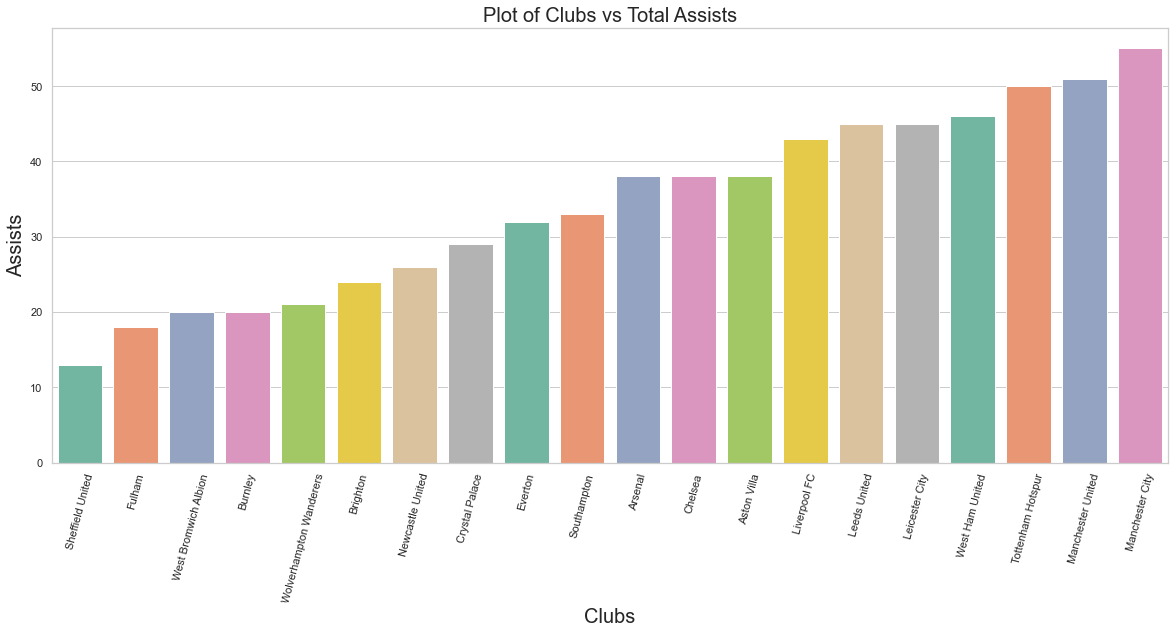

In [84]:
# Total assists from each Club

assists_by_clubs = pd.DataFrame(epl_df.groupby("Club", as_index=False)["Assists"].sum())
sns.set_theme(style="whitegrid", color_codes=True)
ax = sns.barplot(x = "Club", y = "Assists", data = assists_by_clubs.sort_values(by="Assists"), palette="Set2")
ax.set_xlabel("Clubs", fontsize=20)
ax.set_ylabel("Assists", fontsize=20)
plt.xticks(rotation =75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title("Plot of Clubs vs Total Assists", fontsize = 20);

In [85]:
# Top 10 assist leaders
top_10_assists = epl_df[["Name", "Club", "Assists", "Matches"]].nlargest(n=10, columns="Assists")
top_10_assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


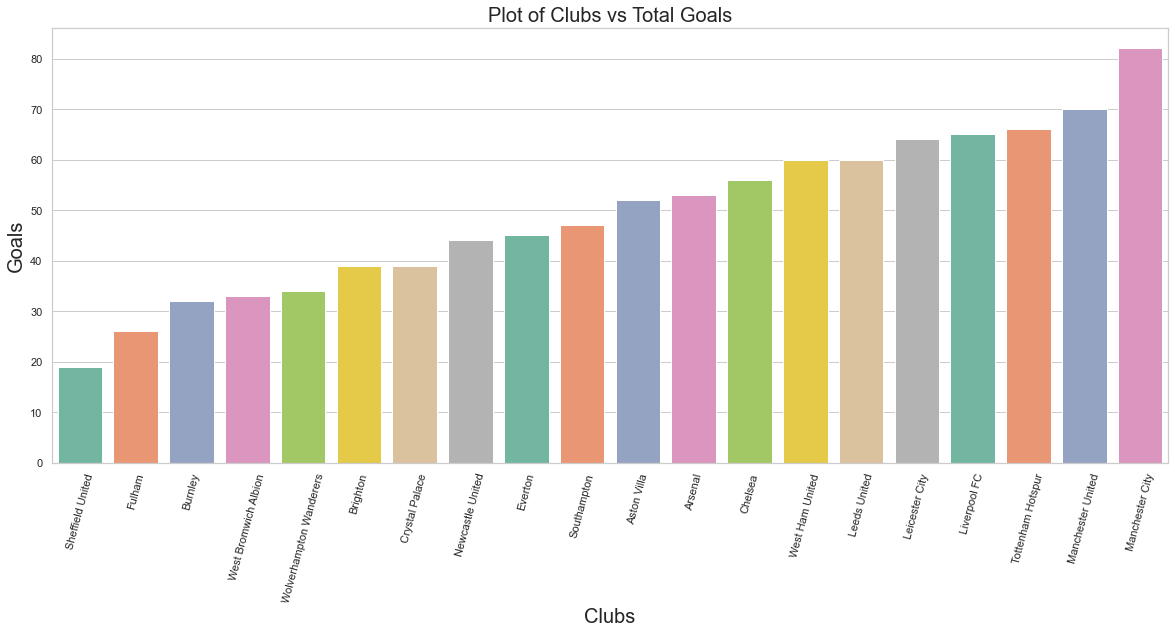

In [87]:
# Total goals from each Club

goals_by_clubs = pd.DataFrame(epl_df.groupby("Club", as_index=False)["Goals"].sum())
sns.set_theme(style="whitegrid", color_codes=True)
ax = sns.barplot(x = "Club", y = "Goals", data = goals_by_clubs.sort_values(by="Goals"), palette="Set2")
ax.set_xlabel("Clubs", fontsize=20)
ax.set_ylabel("Goals", fontsize=20)
plt.xticks(rotation =75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title("Plot of Clubs vs Total Goals", fontsize = 20);

In [90]:
goals_by_clubs = pd.DataFrame(epl_df.groupby("Club", as_index=False)["Goals"].sum()).sort_values(by="Goals", ascending=False)
goals_by_clubs

,Club,Goals
11,Manchester City,82
12,Manchester United,70
16,Tottenham Hotspur,66
10,Liverpool FC,65
9,Leicester City,64
8,Leeds United,60
18,West Ham United,60
4,Chelsea,56
0,Arsenal,53
1,Aston Villa,52


In [93]:
# Most Goals by Players

top_10_goalscorers = epl_df[["Name", "Club", "Goals","Assists", "Matches"]].nlargest(n=10, columns="Goals")
top_10_goalscorers

,Name,Club,Goals,Assists,Matches
162,Harry Kane,Tottenham Hotspur,23,14,35
81,Mohamed Salah,Liverpool FC,22,5,37
51,Bruno Fernandes,Manchester United,18,12,37
161,Son Heung-min,Tottenham Hotspur,17,10,37
214,Patrick Bamford,Leeds United,17,7,38
237,Dominic Calvert-Lewin,Everton,16,0,33
110,Jamie Vardy,Leicester City,15,9,34
267,Ollie Watkins,Aston Villa,14,5,37
33,ƒ∞lkay G√ºndoƒüan,Manchester City,13,2,28
191,Alexandre Lacazette,Arsenal,13,2,31


In [94]:
# Top Goals Per Match

top_goals_per_match = epl_df[["Name", "GoalsPerMatch", "Matches", "Goals"]].nlargest(n=10, columns="GoalsPerMatch")
top_goals_per_match

,Name,GoalsPerMatch,Matches,Goals
162,Harry Kane,0.657143,35,23
81,Mohamed Salah,0.594595,37,22
307,Joe Willock,0.571429,14,8
145,Jesse Lingard,0.562500,16,9
175,Gareth Bale,0.550000,20,11
74,Anthony Elanga,0.500000,2,1
51,Bruno Fernandes,0.486486,37,18
237,Dominic Calvert-Lewin,0.484848,33,16
120,Kelechi Iheanacho,0.480000,25,12
92,Diogo Jota,0.473684,19,9


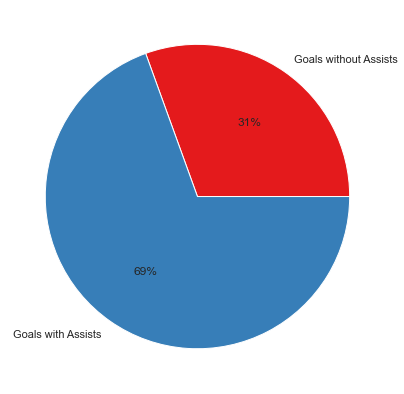

In [96]:
#Pie Chart - Goals with Assists vs Goals without assists

plt.figure(figsize=(14,7))
assists = epl_df["Assists"].sum()
data = [total_goals - assists, assists]
labels = ["Goals without Assists", "Goals with Assists"]
color = sns.color_palette("Set1")
plt.pie(data, labels = labels, colors = color, autopct="%.0f%%")
plt.show();

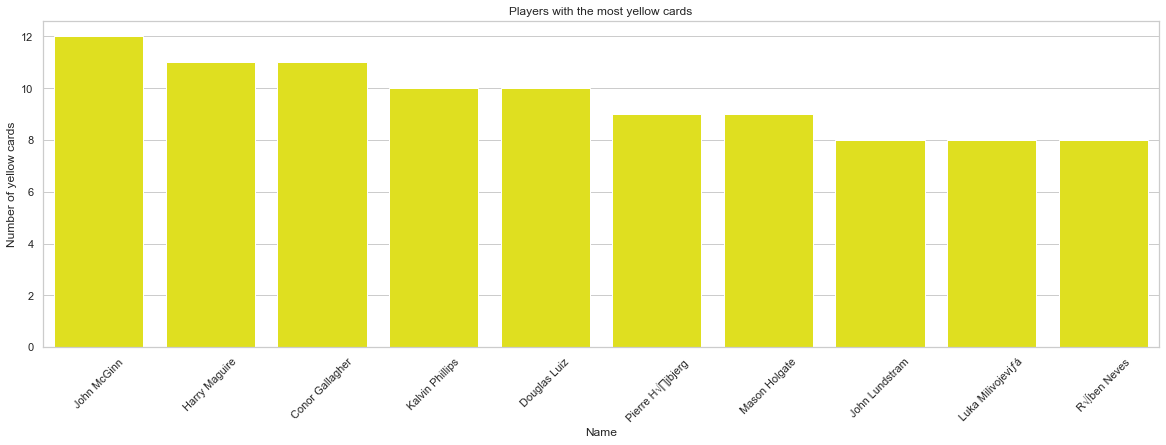

In [99]:
# Top 10 players with the most yellow cards

epl_yellow = epl_df.sort_values(by="Yellow_Cards", ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title("Players with the most yellow cards")
c = sns.barplot(x = epl_yellow["Name"], y=epl_yellow["Yellow_Cards"], label = "Players", color= "yellow")
plt.ylabel("Number of yellow cards")
c.set_xticklabels(c.get_xticklabels(), rotation = 45)
c;

In [101]:
epl_yellow[["Name","Club","Yellow_Cards","Matches"]]

,Name,Club,Yellow_Cards,Matches
266,John McGinn,Aston Villa,12,37
53,Harry Maguire,Manchester United,11,34
480,Conor Gallagher,West Bromwich Albion,11,30
218,Kalvin Phillips,Leeds United,10,29
270,Douglas Luiz,Aston Villa,10,33
159,Pierre H√∏jbjerg,Tottenham Hotspur,9,38
242,Mason Holgate,Everton,9,28
514,John Lundstram,Sheffield United,8,28
346,Luka Milivojeviƒá,Crystal Palace,8,31
318,R√∫ben Neves,Wolverhampton Wanderers,8,36
